In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
# %matplotlib inline
import analysis as ana

In [2]:
# getArrayTraj 
def getArrayTraj(toFind):
    trajs=[]
    Path =  "/Users/mohod/Developer/OTsim/otsim_data/"
    folders  = os.listdir(Path)
    # print(folders)
    for id in toFind:
        for folder in folders:
            # print(folder)
            if(folder[0] != "."):
                files=""
                # try:
                files = os.listdir(Path+folder+"/data/")
                # print(Path+folder+"/data/")
                # except Exception:
                #     print("some")
                #     pass
                for file in files:
                    # print(Path+folder+"/data/")
                    filename = file.split("_")
                    # print(filename[-1])
                    uuid = int(filename[-1].split(".")[0])
                    # print(uuid)
                    if uuid == id:
                        trajs.append([file,ana.expand_trajectory(np.load(Path+folder+"/data/"+file))])
    return trajs

In [3]:
# getArrayRadius
def getArrayRadius(allTraj):
    ans = []
    sds = []
    # print(allTraj[1][1,:].shape)
    for traj in allTraj:
        # print(traj[0])
        radius, sd = ana.getRadius(traj[1])
        ans.append(radius)
        sds.append(sd)
    return ans,sds
def getArrayFrequency(allTraj):
    ans = []
    for traj in allTraj:
        ans.append(ana.getfreq(traj[1][:,0]))
    return np.abs(ans)
        

10 10


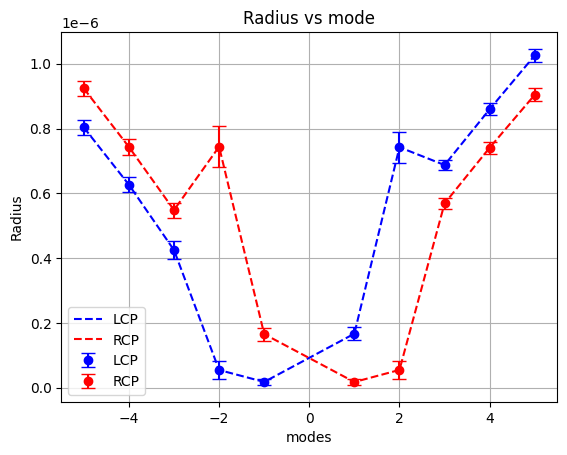

In [4]:
modes = [-5,-4,-3,-2,-1,1,2,3,4,5]
LCP_modeVar = getArrayTraj([3080017,4099843,3864095,6705893,2789572,2322232,5118391,1544562,6897390,5357862])
RCP_modeVar = getArrayTraj([6491602,4061540,6244212,2548265,1762004,7167251,9785005,6558493,5600605,4317625])

print(len(LCP_modeVar),len(RCP_modeVar))

lcp_radius,lcp_sd = getArrayRadius(LCP_modeVar)
rcp_radius,rcp_sd = getArrayRadius(RCP_modeVar)

plt.errorbar(modes,lcp_radius,fmt="o", label ="LCP", color="blue" ,yerr=lcp_sd,capsize=5)
plt.errorbar(modes,rcp_radius, fmt="o",label ="RCP",color="red", yerr=rcp_sd,capsize=5)
plt.plot(modes,lcp_radius,"--", label ="LCP",color="blue")
plt.plot(modes,rcp_radius,"--", label ="RCP",color="red")
plt.legend()
plt.title("Radius vs mode")
plt.ylabel("Radius")
plt.xlabel("modes")
plt.grid()


#index radiLCP sdLCP radiRCP sdRCP
data=[]
for i in range(len(modes)):
      data.append(
            [modes[i],
            lcp_radius[i],
            lcp_sd[i],
            rcp_radius[i],
            rcp_sd[i]]
      )
data = np.array(data)
np.save("modeVSradius_dimer.npy",data)
plt.savefig("modeVSradius_dimer.png")


In [5]:
def gaussian(x, amp, mean, std):
    return amp * np.exp(-(x - mean)**2 / (2 * std**2))

def getplotfreq(traj):
    # traj = traj[:,0]
    traj = traj[:-1]
    N= len(traj)
    sampling_frequency = 1e-5  # samples per second
    signal = traj 
    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(N,sampling_frequency)
    testFFT_mag = np.abs(fft_result)/N
    pos = np.argmax(testFFT_mag)
    # print(pos)
    width =int(100)
    print(np.argmax(testFFT_mag))
    print(frequencies[pos], np.abs(testFFT_mag[pos]))
    # print(frequencies[pos-1], np.abs(testFFT_mag[pos-1]))
    # print(frequencies[pos+1], np.abs(testFFT_mag[pos+1]))
    x =[]
    y =[]
    for i in range(len(frequencies)):
        if i > pos-width and i < pos+width:
            x.append(float(frequencies[i]))
            y.append(float(testFFT_mag[i]))
            # print(float(frequencies[i]),float(np.abs(testFFT_mag[i])))

    yave = np.sqrt(np.average(np.square(y))  )  

    try:
        popt, pcov = curve_fit(gaussian, x, y, p0=[yave, frequencies[pos], yave/2]) 
        print(popt)
        plt.figure(figsize=(30,5))
        plt.scatter(x,y)
        # plt.plot(frequencies,testFFT_mag)
        # plt.xlim((0,10))
        plt.plot(x, gaussian(x, *popt), 'r-')
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.title("FFT of Signal")
        

        plt.grid()
        plt.show()
    except: 
        pass
    

    

    


LCP_0.03_3864095.npy -3
[ 2.54671294e+01 -5.67510422e-08  6.83281523e-08  4.84194186e+00
  1.47261124e-10]
500001
LCP_0.03_3080017.npy -5
28
5.6000000000000005 4.75311605511563e-07
[4.75311590e-07 5.60000000e+00 2.52064494e-08]


/var/folders/9k/p2sjrndj7_z008x0pjq9zp480000gn/T/ipykernel_54873/3981301278.py:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gaussian, x, y, p0=[yave, frequencies[pos], yave/2])


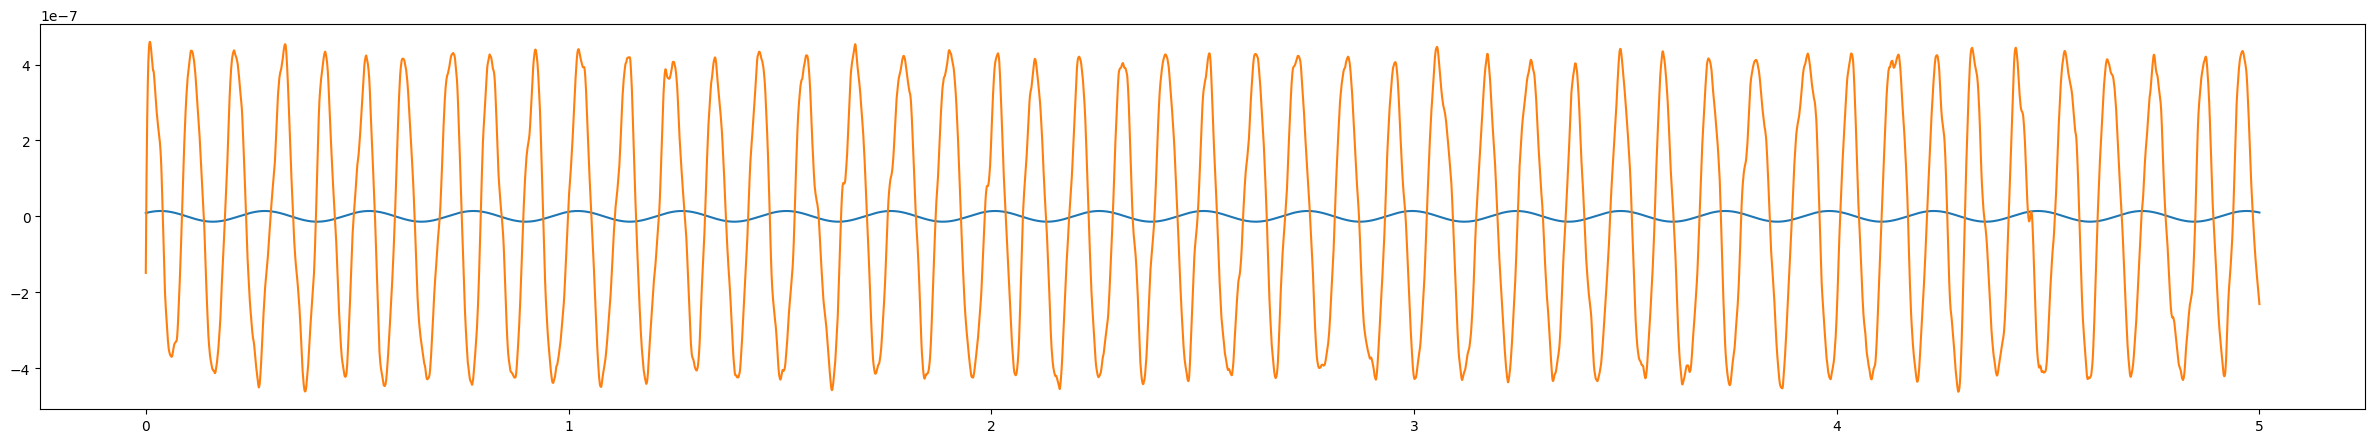

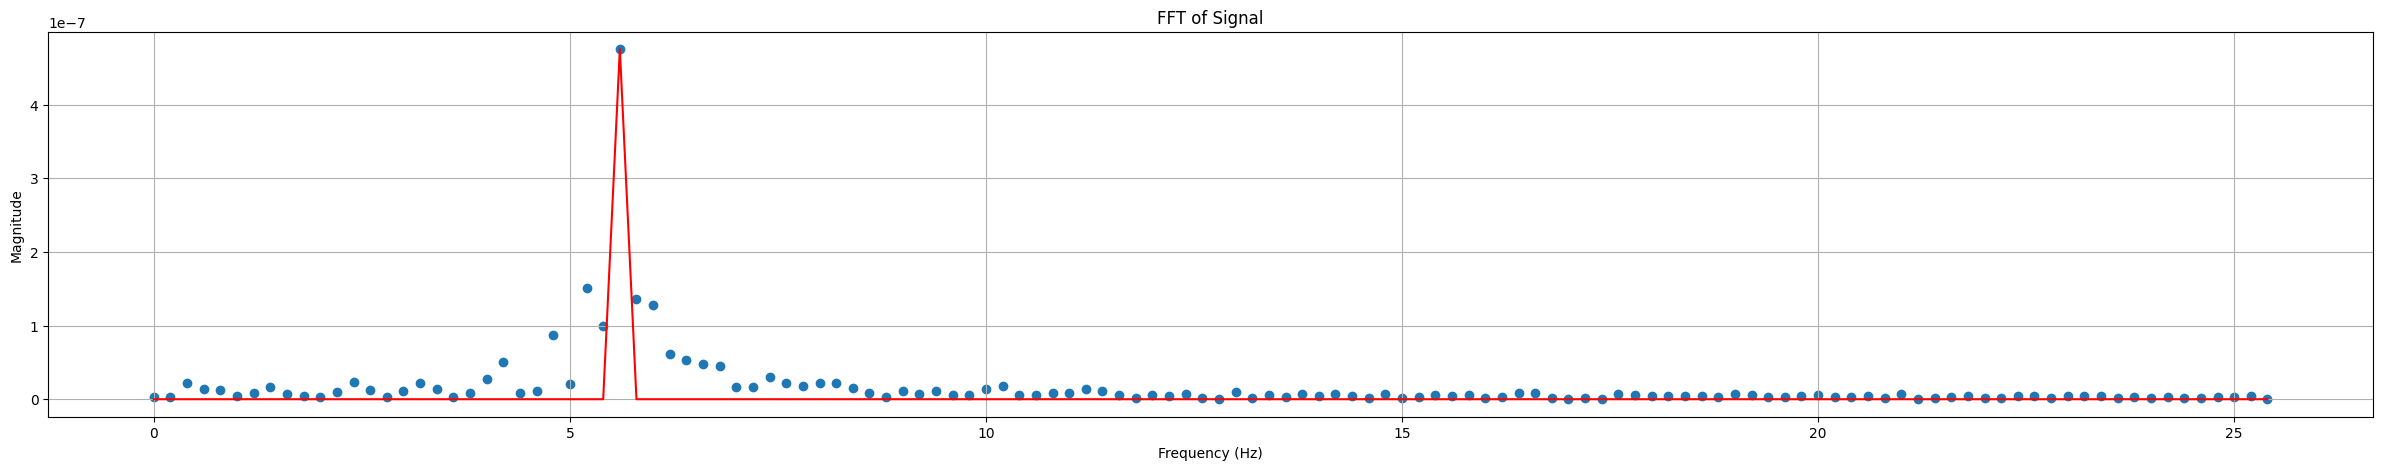

LCP_0.03_4099843.npy -4
35
7.0 3.223988310448984e-07
[3.22398833e-07 7.00000000e+00 1.90313970e-08]


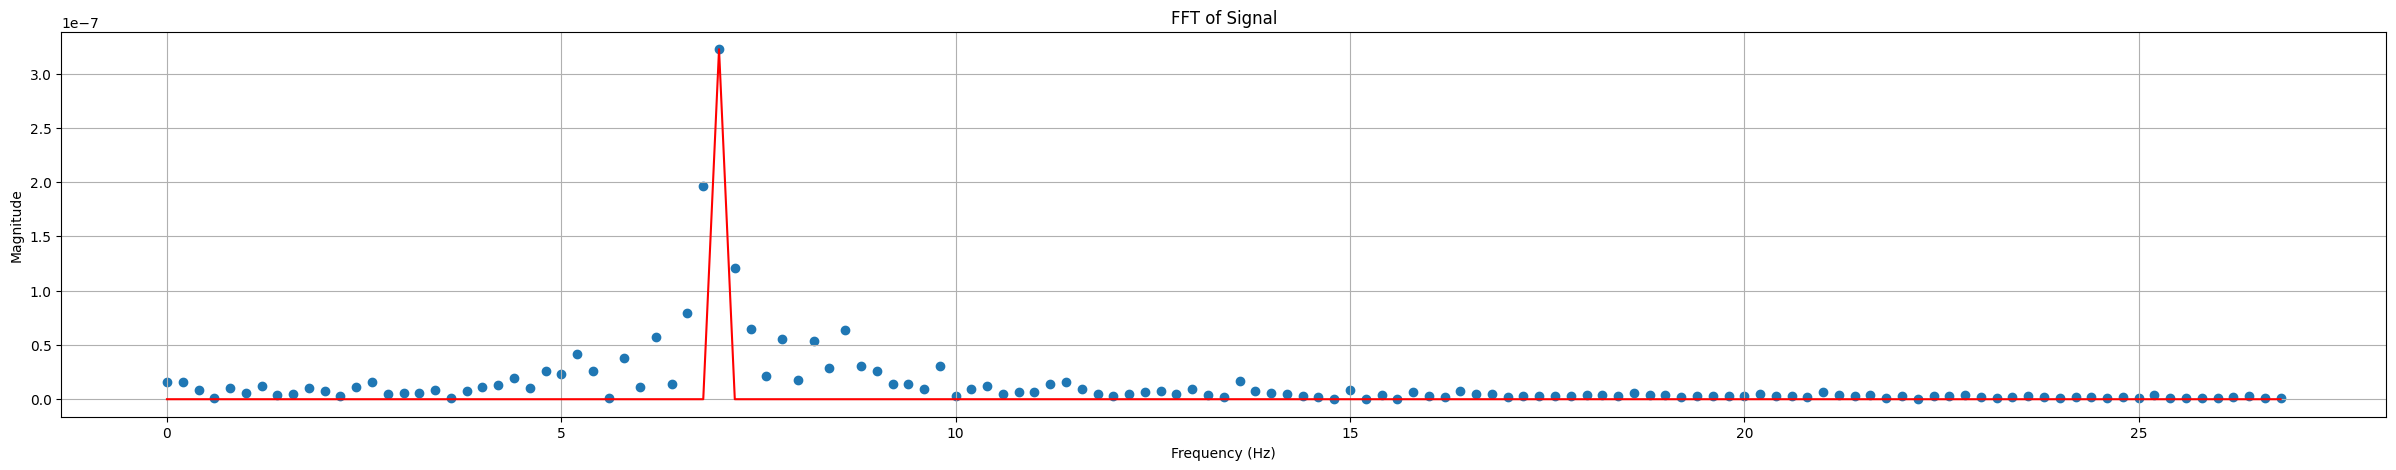

LCP_0.03_3864095.npy -3
47
9.4 2.2281083721065012e-07
[2.22810833e-07 9.40000000e+00 1.22378096e-08]


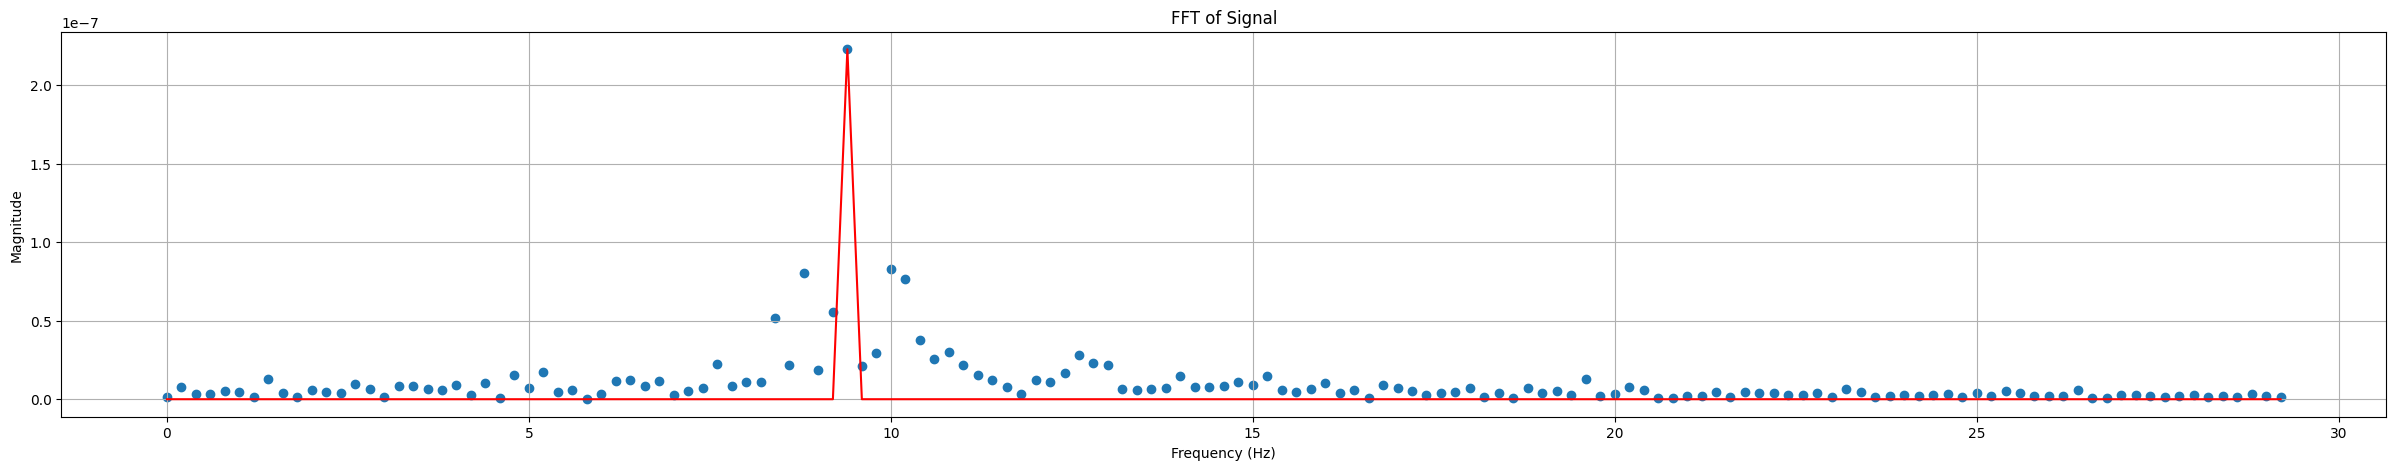

LCP_0.03_6705893.npy -2
246
49.2 4.248625012414442e-09
[4.24862503e-09 4.92000000e+01 7.80352578e-10]


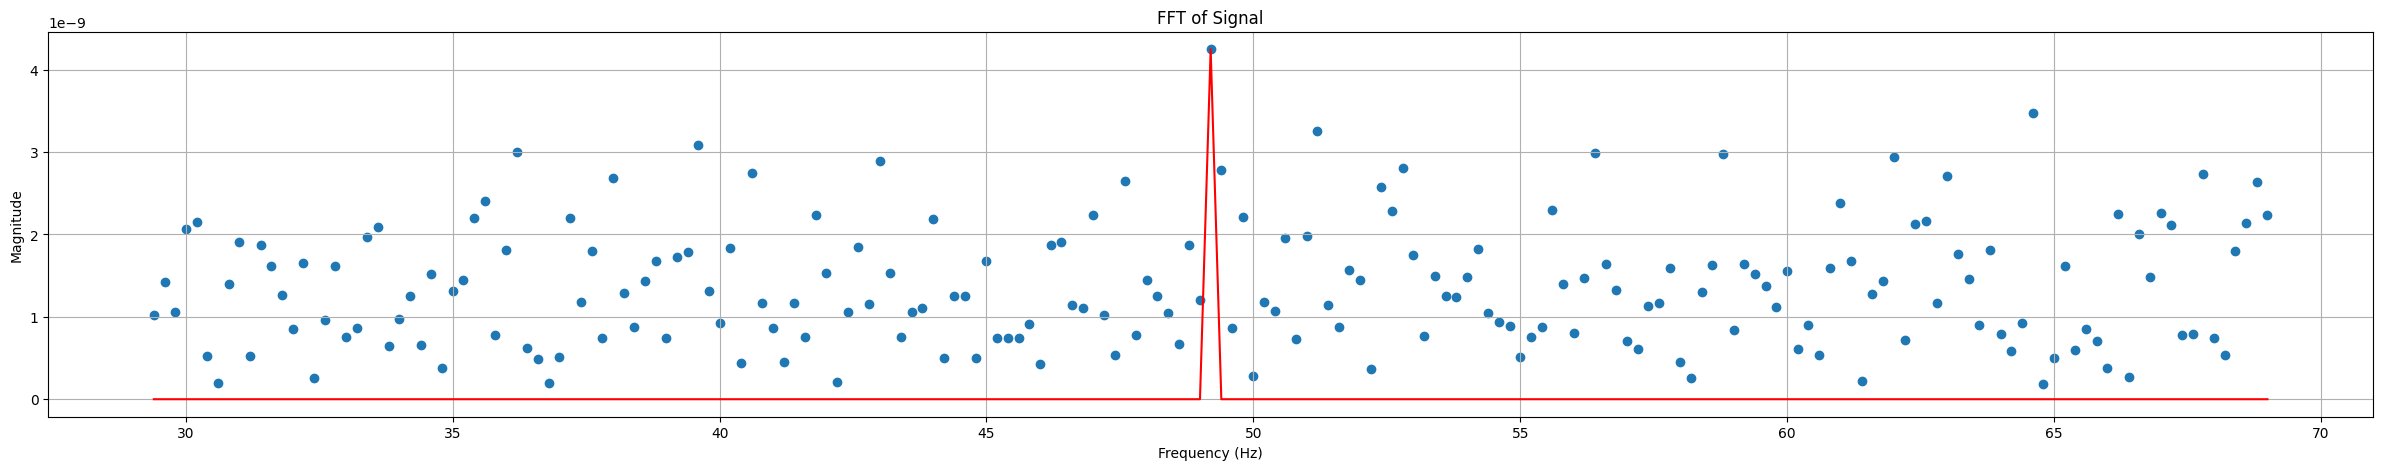

LCP_0.03_2789572.npy -1
541
108.2 6.926154091417247e-10
[6.92615411e-10 1.08200000e+02 1.35434118e-10]


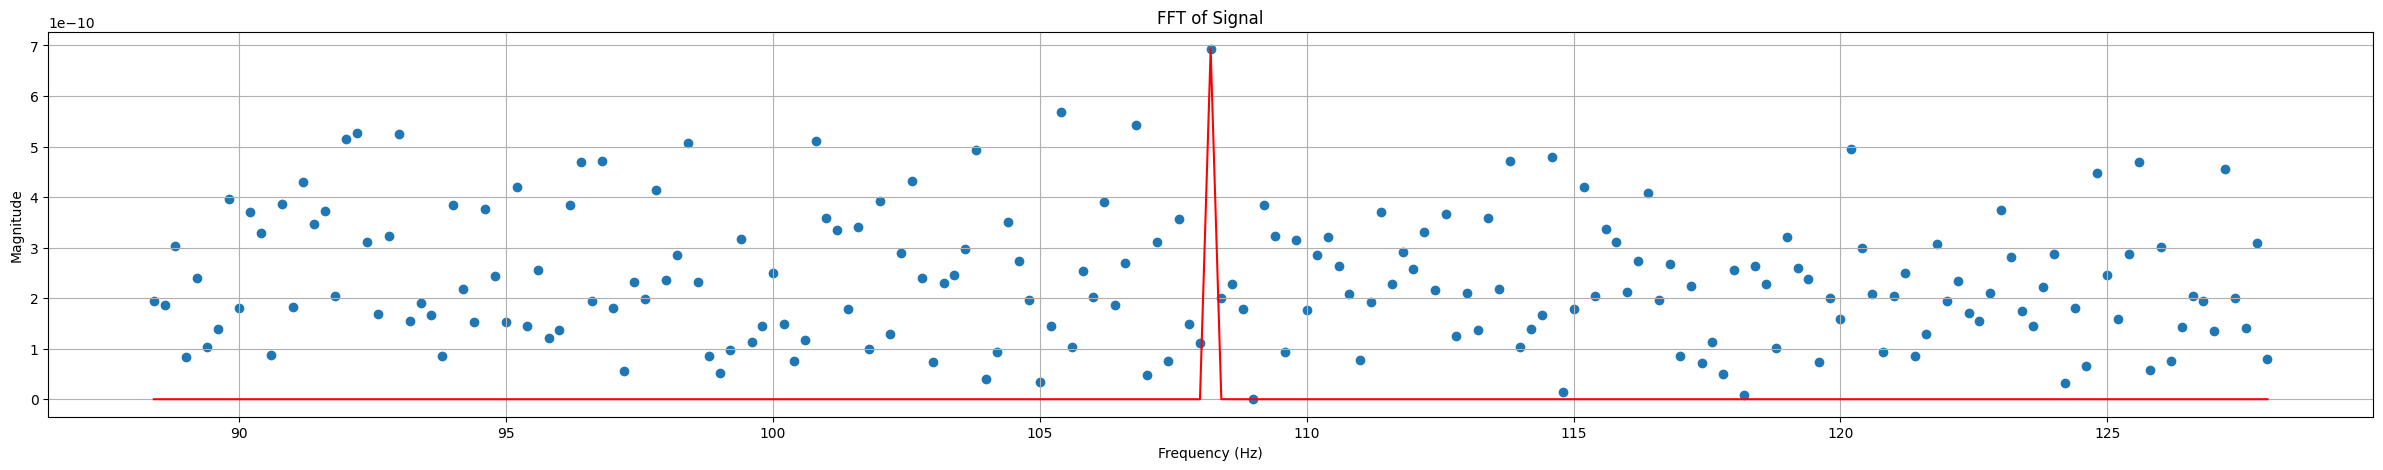

LCP_0.03_2322232.npy 1
499873
-25.400000000000002 6.26336304862821e-08
[ 6.26336305e-08 -2.54000000e+01  4.16485323e-09]


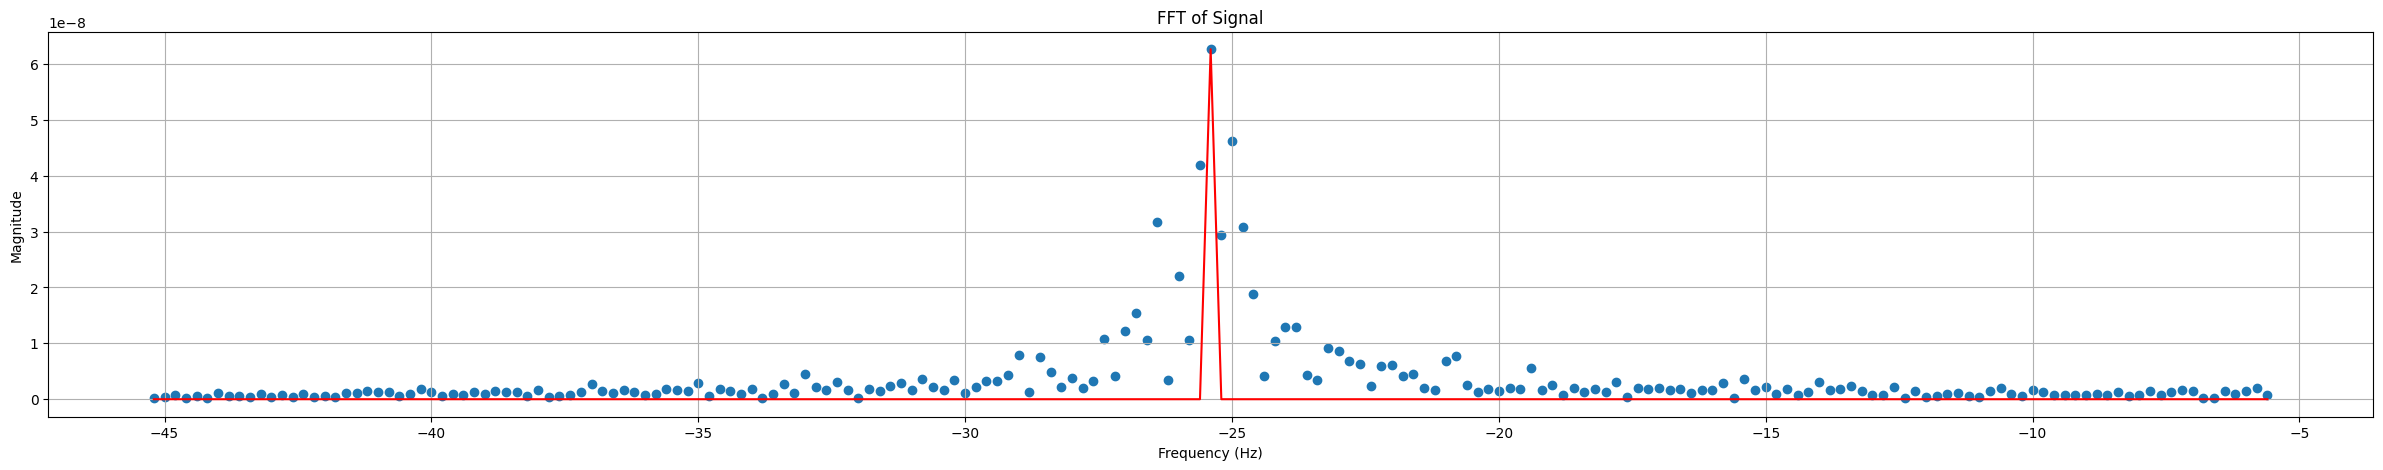

LCP_0.03_5118391.npy 2
70
14.0 1.5813194150379617e-07
[1.58131944e-07 1.40000000e+01 1.99238780e-08]


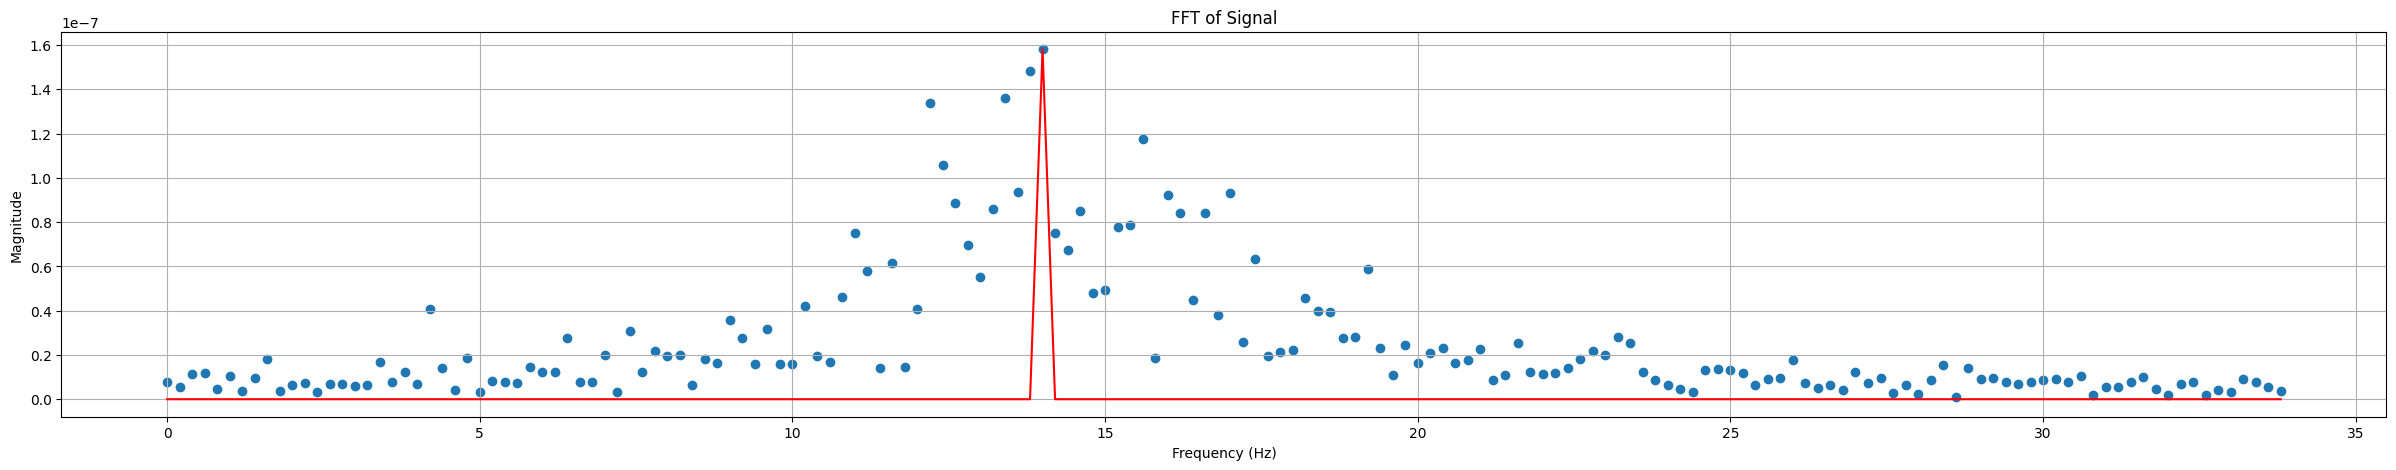

LCP_0.03_1544562.npy 3
57
11.4 2.857856063581475e-07
[2.85785610e-07 1.14000000e+01 1.93376855e-08]


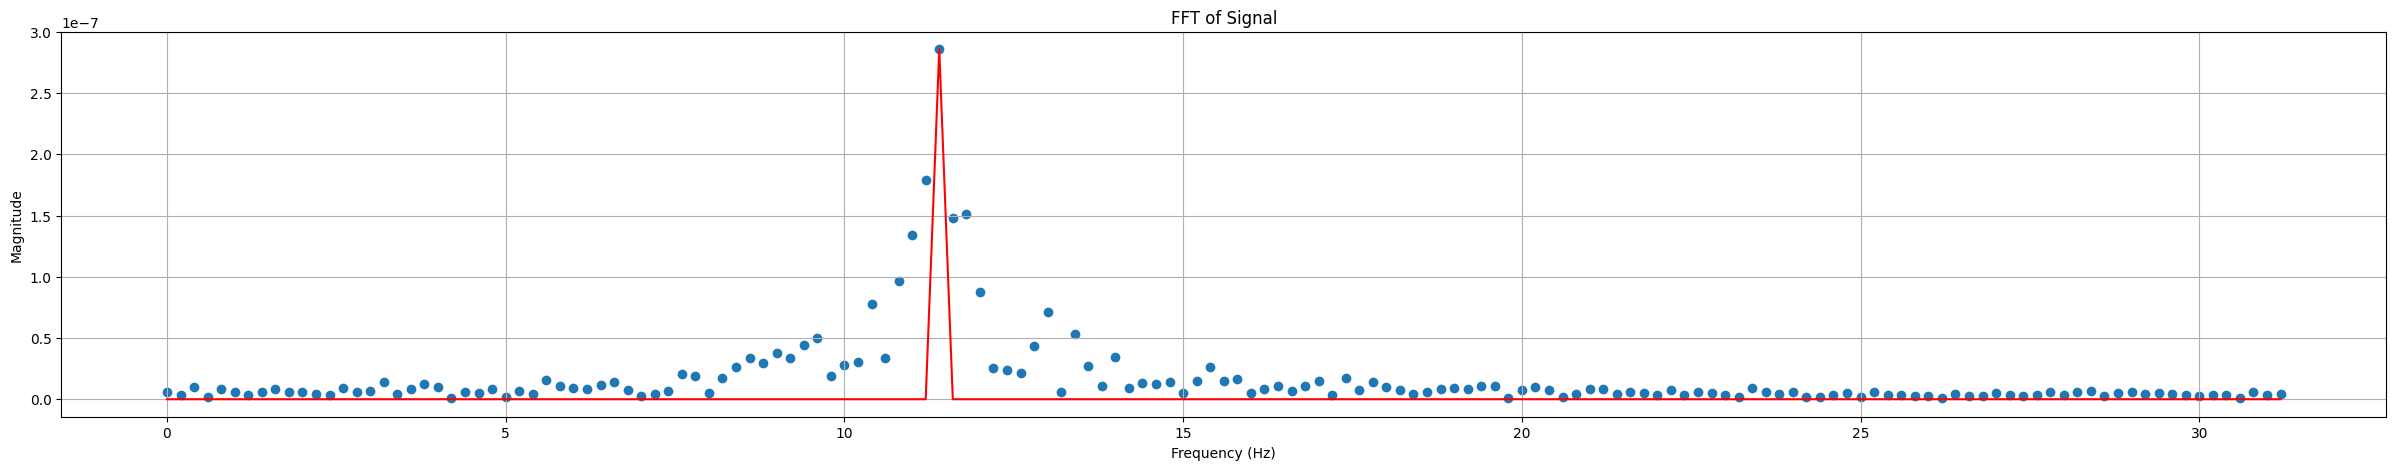

LCP_0.03_6897390.npy 4
40
8.0 5.051611121402474e-07
[5.05161093e-07 8.00000000e+00 2.55538744e-08]


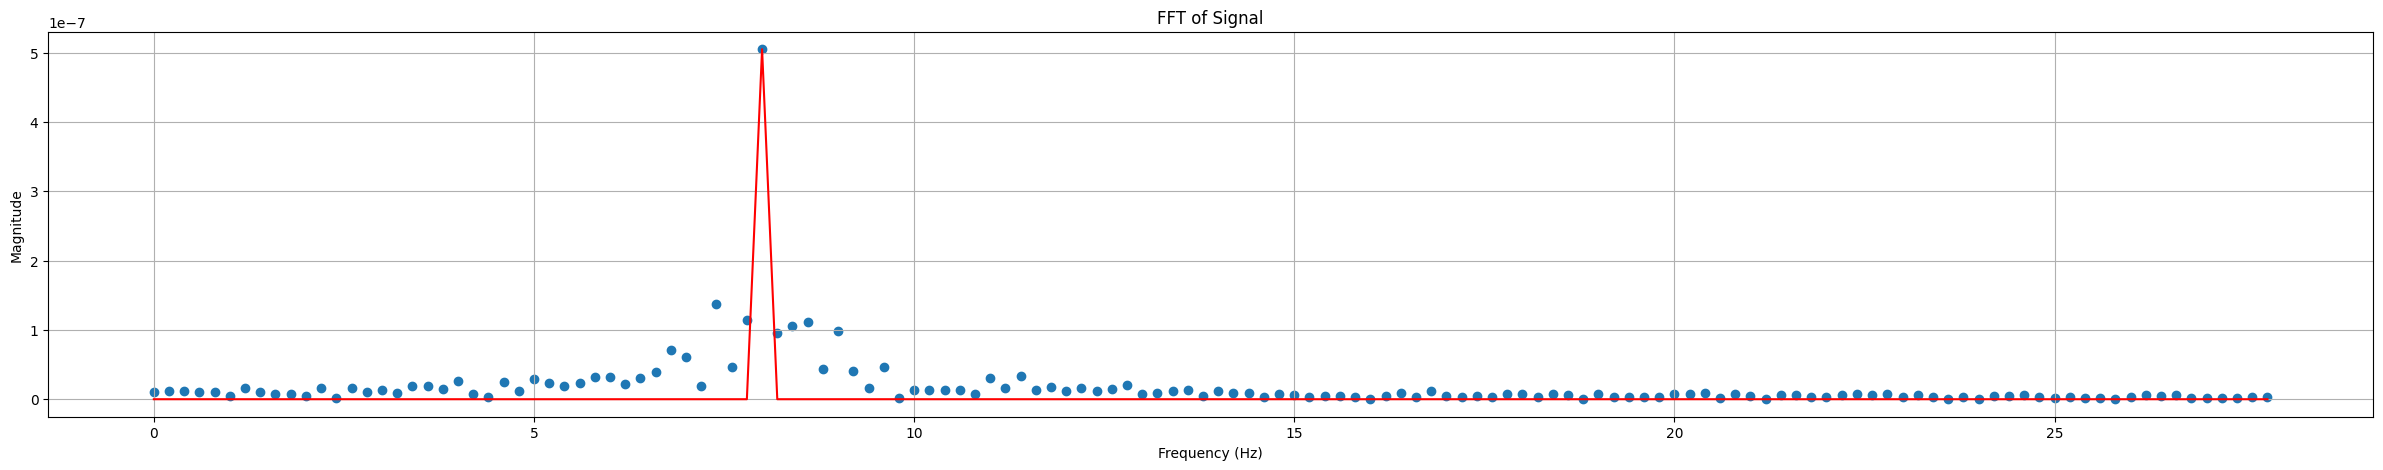

LCP_0.03_5357862.npy 5
499971
-5.800000000000001 6.543833170997056e-07
[ 6.54383334e-07 -5.80000000e+00  3.18539018e-08]


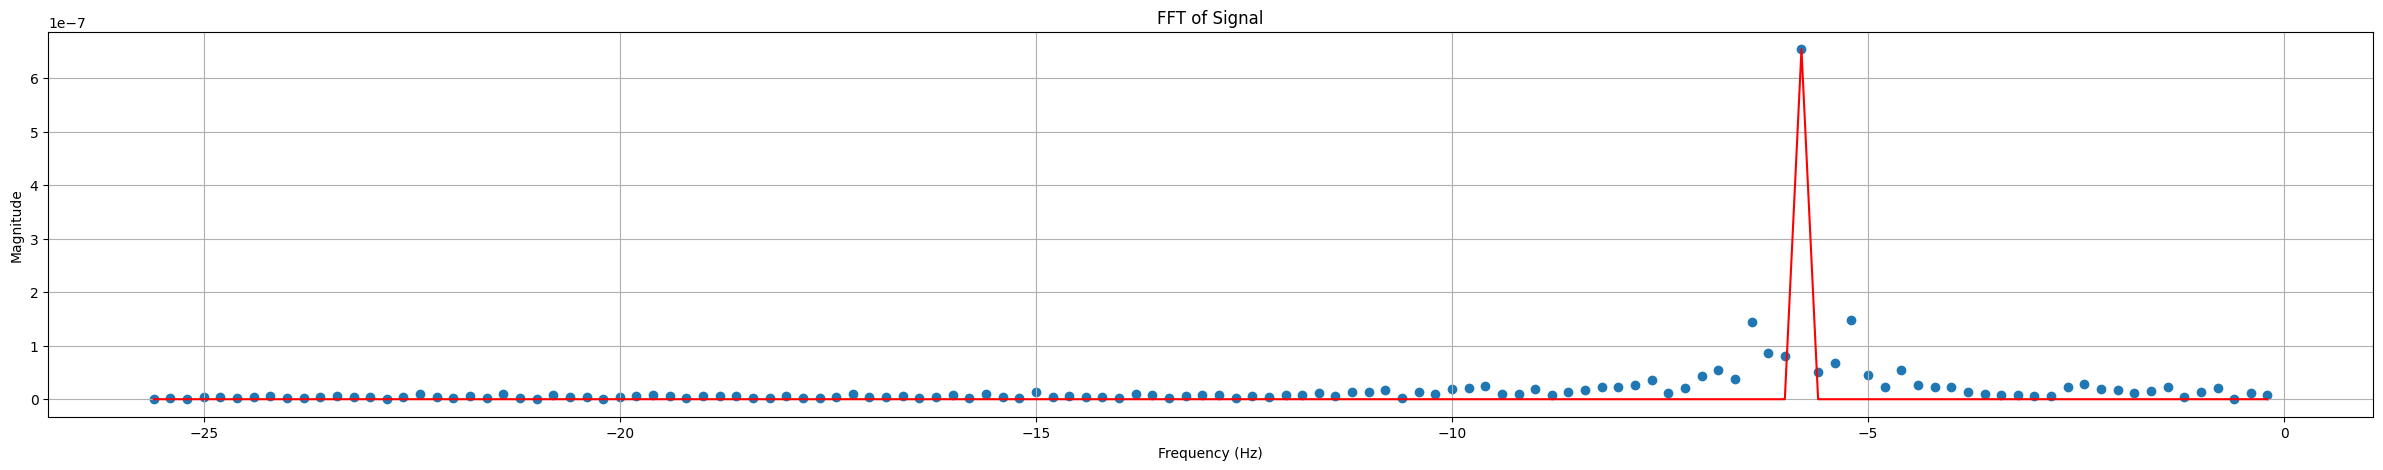

In [6]:
# print(LCP_modeVar[6][1][:-1,0].shape)
curTraj = 2
curPol = LCP_modeVar
# curPol = RCP_modeVar
plt.figure(figsize=(30,5))
print(curPol[curTraj][0],modes[curTraj])
traj = curPol[curTraj][1][:,0]

# Apply Savitzky-Golay filter
window_length = 3000
polyorder =4
traj = savgol_filter(traj, window_length, polyorder)


def gaussiansign(t,w,a,b,ps,d):
    return a*np.sin(w*t) +b*np.cos(w*t+ps) +d
xt = np.linspace(0,5,len(traj))
popt, pcov = curve_fit(gaussiansign, xt, traj, p0=[25,1,1,np.pi,0]) 
print(popt)
print(len(traj))
plt.plot(xt,gaussiansign(xt,popt[0],popt[1],popt[2],popt[3],popt[4]))

plt.plot(xt,traj)
# getplotfreq(curPol[curTraj][1][:,0])
# getplotfreq(traj)


for i in range(len(LCP_modeVar)):
    print(LCP_modeVar[i][0],modes[i])
    getplotfreq(LCP_modeVar[i][1][:,0]+LCP_modeVar[i][1][:,1])